In [1]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import numpy as np
import torch

from deepsvdd.train import TrainerDeepSVDD
from deepsvdd.test import eval
from preprocess import get_ALeRCE_data

In [2]:
class Args:
    num_epochs=1000
    patience=100
    lr=1e-6
    weight_decay= 0.5e-1
    lr_milestones=[150, 300, 450, 600]
    batch_size=128
    pretrain=True
    latent_dim=32   
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataloader_train, scaler, classes = get_ALeRCE_data(args.batch_size, 'train', mode='train')
dataloader_val, _, _ = get_ALeRCE_data(args.batch_size, 'val', mode='test', scaler=scaler)
dataloader_test, _, _ = get_ALeRCE_data(args.batch_size, 'test', mode='test', scaler=scaler)

deep_SVDD = TrainerDeepSVDD(args, dataloader_train, dataloader_val, device)
deep_SVDD.train()

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 0, Loss: 0.187
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 0, Loss: 0.168
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 1, Loss: 0.170
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 1, Loss: 0.152
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 2, Loss: 0.155
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 2, Loss: 0.137
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 3, Loss: 0.141
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 3, Loss: 0.124
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 4, Loss: 0.128
4741/4741: [=====

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 37, Loss: 0.006
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 37, Loss: 0.00507
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 38, Loss: 0.005
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 38, Loss: 0.00481
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 39, Loss: 0.005
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 39, Loss: 0.0047
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 40, Loss: 0.005
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 40, Loss: 0.00446
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 41, Loss: 0.005
4

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 74, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 74, Loss: 0.00184
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 75, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 75, Loss: 0.00178
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 76, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 76, Loss: 0.00179
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 77, Loss: 0.002
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 77, Loss: 0.00174
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 78, Loss: 0.002
4741/4741: [===

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 111, Loss: 0.001
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 111, Loss: 0.000817
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 112, Loss: 0.001
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 112, Loss: 0.000821
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 113, Loss: 0.001
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 113, Loss: 0.000787
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 114, Loss: 0.001
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 114, Loss: 0.0008
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 115, Loss: 0.001
4741/4741: [=======

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 148, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 148, Loss: 0.000397
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 149, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 149, Loss: 0.000398
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 150, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 150, Loss: 0.000399
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 151, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 151, Loss: 0.000396
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 152, Loss: 0.000
4741/4741: [=====

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 186, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 186, Loss: 0.000361
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 187, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 187, Loss: 0.000351
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 188, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 188, Loss: 0.000367
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 189, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 189, Loss: 0.000394
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 190, Loss: 0.000
4741/4741: [====================

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 225, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 225, Loss: 0.000344
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 226, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 226, Loss: 0.000347
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 227, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 227, Loss: 0.000338
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 228, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 228, Loss: 0.00033
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 229, Loss: 0.000
4741/4741: [===============================>] - 

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 263, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 263, Loss: 0.000297
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 264, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 264, Loss: 0.000305
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 265, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 265, Loss: 0.000304
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 266, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 266, Loss: 0.000318
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 267, Loss: 0.000
4741/4741: [====================

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 302, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 302, Loss: 0.000286
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 303, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 303, Loss: 0.00031
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 304, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 304, Loss: 0.000292
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 305, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 305, Loss: 0.000292
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 306, Loss: 0.000
4741/4741: [===============================>] - 

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 340, Loss: 0.000291
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 341, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 341, Loss: 0.000291
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 342, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 342, Loss: 0.000289
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 343, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 343, Loss: 0.000316
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 344, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 344, Loss: 0.000303
27058/27058: [===============================

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 379, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 379, Loss: 0.000293
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 380, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 380, Loss: 0.000295
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 381, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 381, Loss: 0.000303
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 382, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 382, Loss: 0.000293
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 383, Loss: 0.000
4741/4741: [===============================>] -

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 417, Loss: 0.000283
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 418, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 418, Loss: 0.000286
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 419, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 419, Loss: 0.000284
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 420, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 420, Loss: 0.000301
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 421, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 421, Loss: 0.00031
27058/27058: [===============================>

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 456, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 456, Loss: 0.00027
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 457, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 457, Loss: 0.000281
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 458, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 458, Loss: 0.000279
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 459, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 459, Loss: 0.000286
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 460, Loss: 0.000
4741/4741: [===============================>] - 

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 494, Loss: 0.000303
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 495, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 495, Loss: 0.000283
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 496, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 496, Loss: 0.000289
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 497, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 497, Loss: 0.000293
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 498, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 498, Loss: 0.00028
27058/27058: [===============================>

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 533, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 533, Loss: 0.000282
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 534, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 534, Loss: 0.000264
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 535, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 535, Loss: 0.000282
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 536, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 536, Loss: 0.000299
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 537, Loss: 0.000
4741/4741: [====================

4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 571, Loss: 0.000288
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 572, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 572, Loss: 0.000284
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 573, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 573, Loss: 0.000297
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 574, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 574, Loss: 0.000311
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 575, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 575, Loss: 0.000266
27058/27058: [===============================

27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 610, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 610, Loss: 0.000281
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 611, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 611, Loss: 0.00028
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 612, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 612, Loss: 0.000292
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 613, Loss: 0.000
4741/4741: [===============================>] - ETA 0.0s
Testing Autoencoder... Epoch: 613, Loss: 0.000279
27058/27058: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 614, Loss: 0.000
4741/4741: [===============================>] - 

In [3]:
labels1, labels2, scores = eval(deep_SVDD.net, deep_SVDD.c, dataloader_test, device)

Testing...
ROC AUC score: 0.655


In [4]:
scores_in = scores[labels1==0]
scores_out = scores[labels1==1]

scores_ELL = scores[labels2==1]
scores_TDE = scores[labels2==2]
scores_SNIIb = scores[labels2==3]
scores_WRayot = scores[labels2==4]

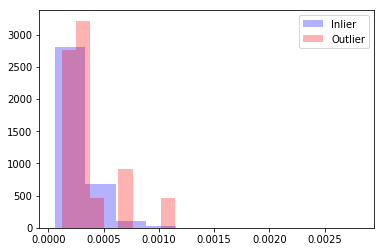

In [5]:
plt.hist(scores_in[scores_in<20], bins=10, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=8, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


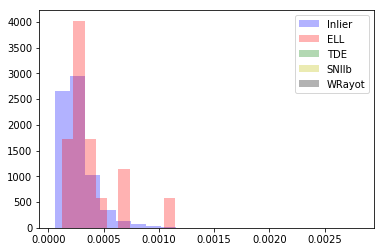

In [11]:
plt.hist(scores_in, bins=20, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_ELL, bins=10, color='r', alpha=0.3, density=True, label='ELL')
plt.hist(scores_TDE, bins=1, color='g', alpha=0.3, density=True, label='TDE')
plt.hist(scores_SNIIb, bins=10, color='y', alpha=0.3, density=True, label='SNIIb')
plt.hist(scores_WRayot, bins=2, color='k', alpha=0.3, density=True, label='WRayot')
plt.legend()